In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

# Read in the data
rawDF = pd.read_csv("Cancer_Data.csv")

# Take a peek at the data
rawDF.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# Drop the 'id' column as its useless to us
rawDF = rawDF.drop(["Unnamed: 32","id"], axis = 1)

# Let's also change diagnosis into a numeric binary variable
rawDF.diagnosis = [1 if each == "M" else 0 for each in rawDF.diagnosis]

# Take a peek at the dataframe again after dropping 'id'
rawDF.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Let's take a deeper look at the data and use the describe function
rawDF.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# Let's also use a for loop to check for NA values
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of NA values in the {col} col is {naCount}")

The number of NA values in the diagnosis col is 0
The number of NA values in the radius_mean col is 0
The number of NA values in the texture_mean col is 0
The number of NA values in the perimeter_mean col is 0
The number of NA values in the area_mean col is 0
The number of NA values in the smoothness_mean col is 0
The number of NA values in the compactness_mean col is 0
The number of NA values in the concavity_mean col is 0
The number of NA values in the concave points_mean col is 0
The number of NA values in the symmetry_mean col is 0
The number of NA values in the fractal_dimension_mean col is 0
The number of NA values in the radius_se col is 0
The number of NA values in the texture_se col is 0
The number of NA values in the perimeter_se col is 0
The number of NA values in the area_se col is 0
The number of NA values in the smoothness_se col is 0
The number of NA values in the compactness_se col is 0
The number of NA values in the concavity_se col is 0
The number of NA values in the 

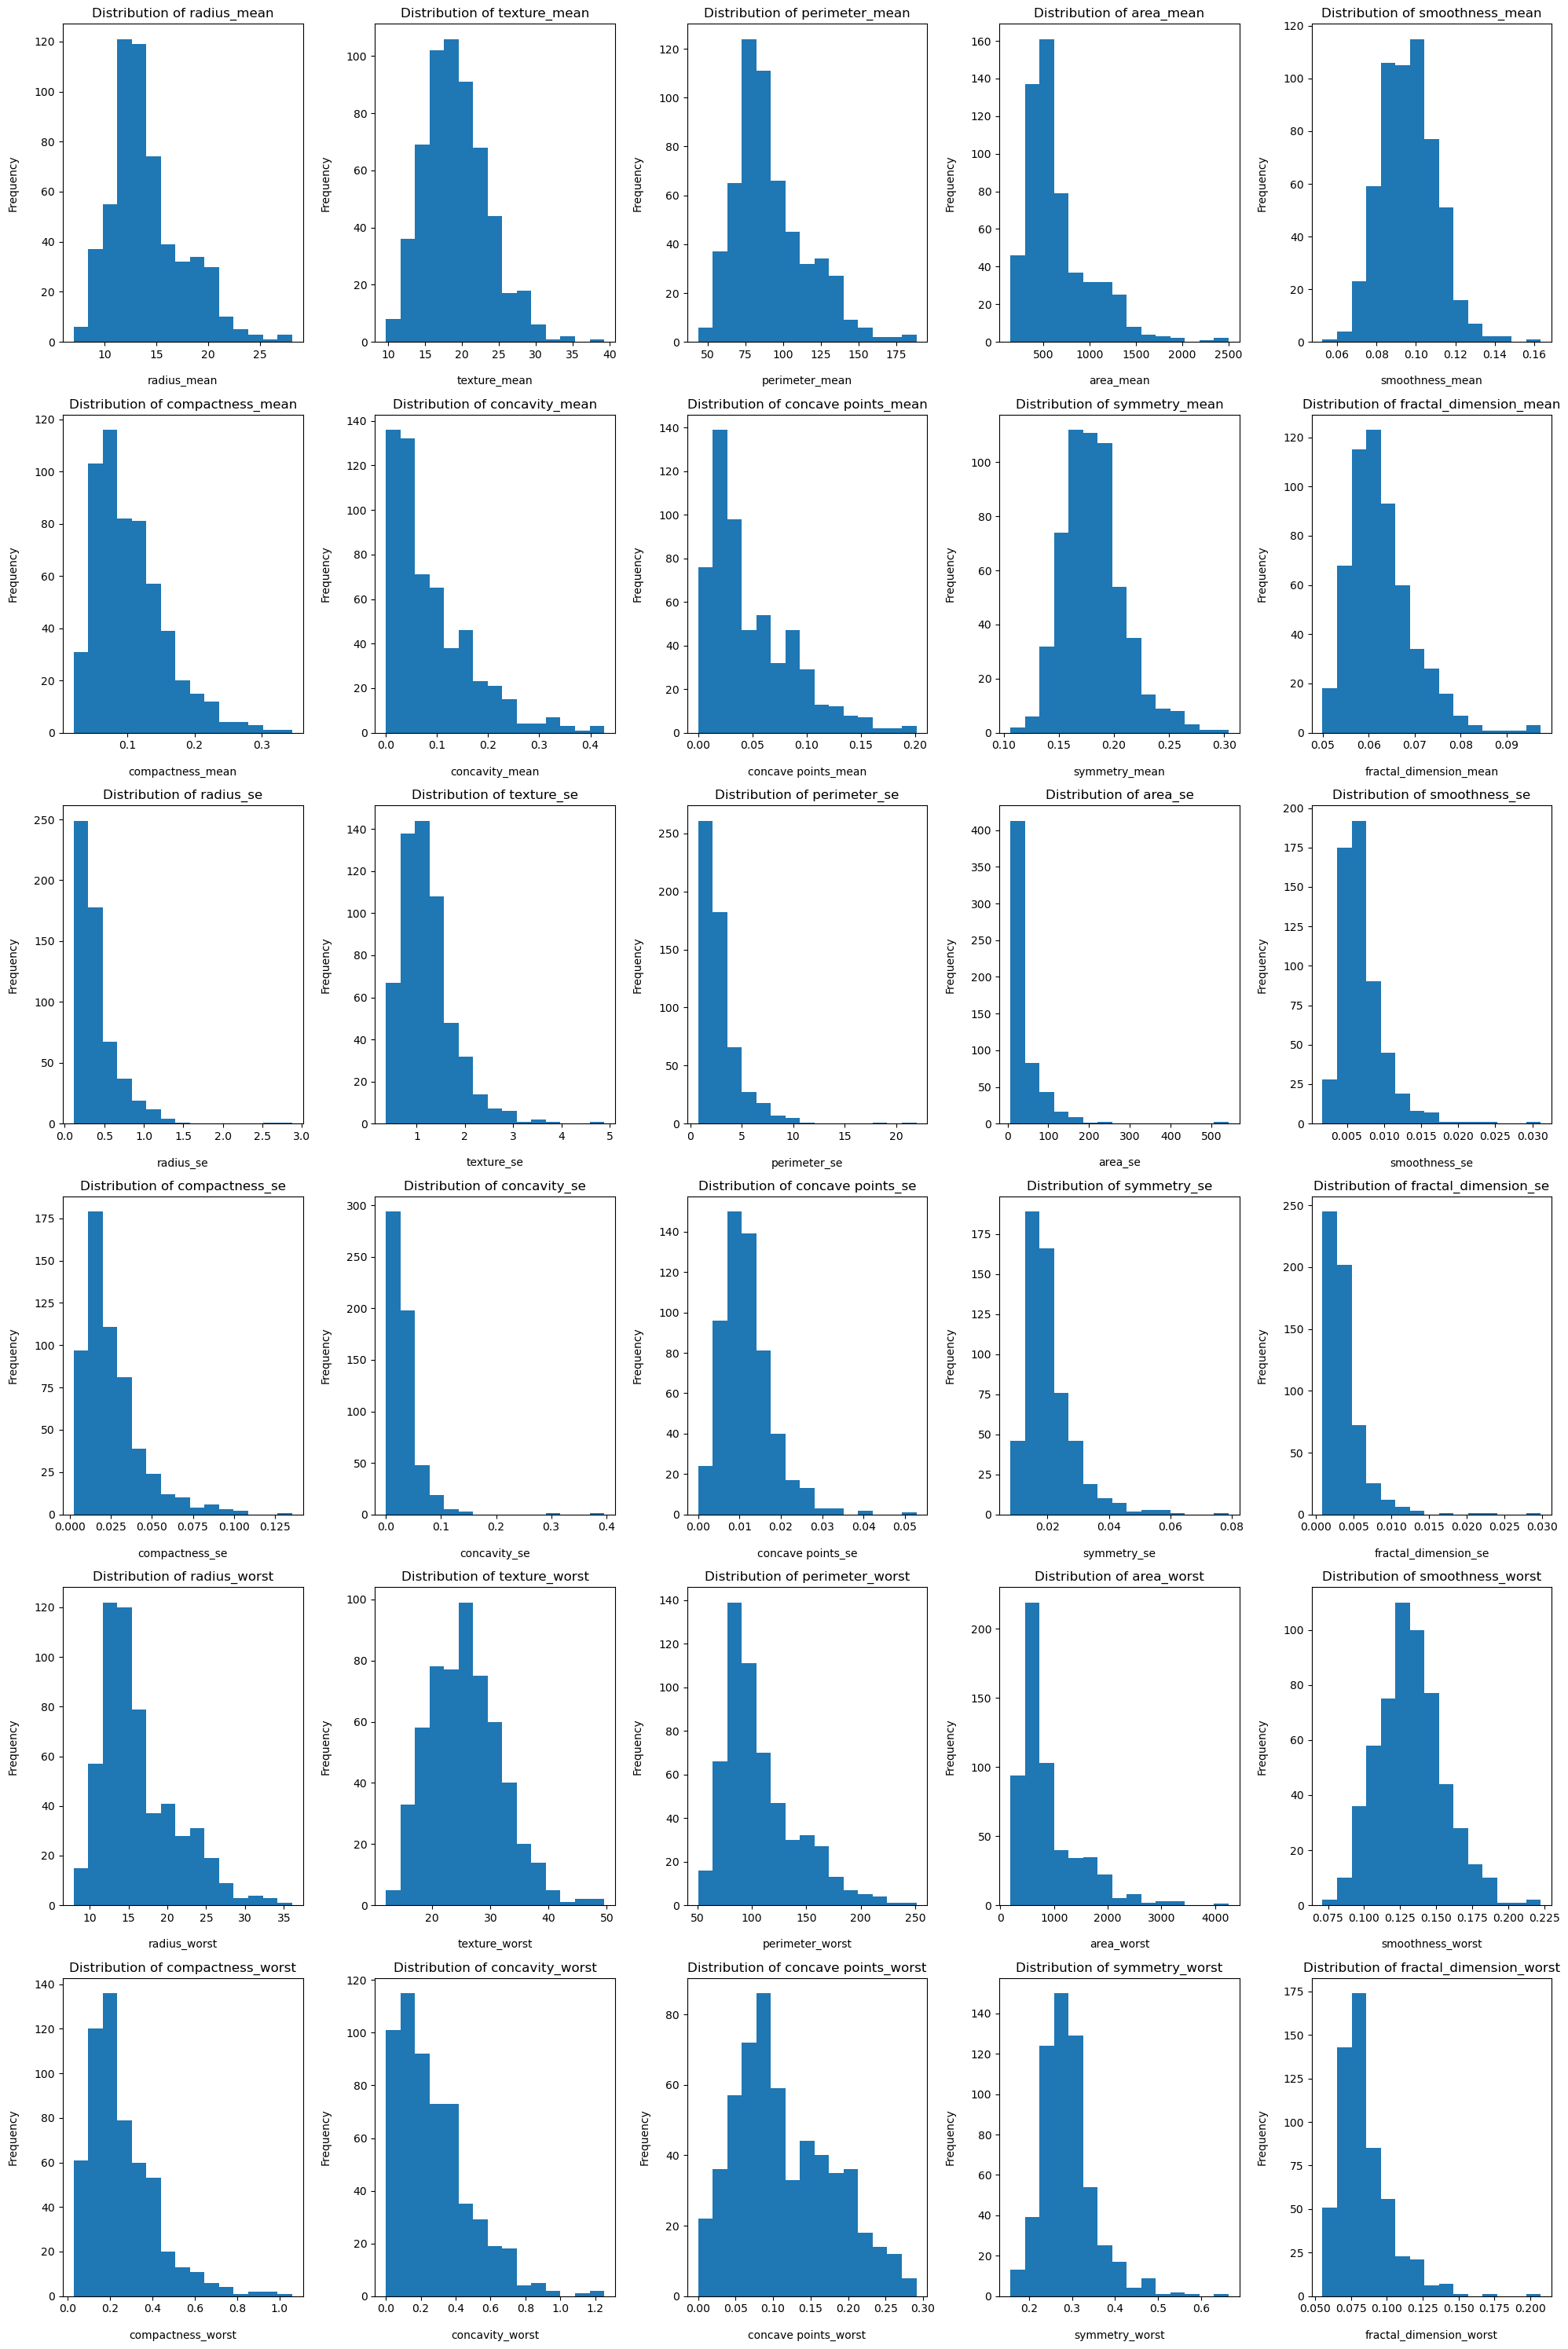

In [5]:
# Great! It looks like there's no NA values.
# Next let's make histograms to show the distribution of data in our data set.

def makeHistValueCounts(rawDF, column_names):
    # Calculate the number of rows and columns for the subplots
    n_cols = 5  # You can adjust this value based on your preference and screen resolution
    n_rows = (len(column_names) + n_cols - 1) // n_cols  # Rounds up to ensure there is enough grid space

    # Create a subplot grid
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  # Adjust figsize dynamically
    axs = axs.flatten()  # Flatten the array of axes to simplify indexing

    # Plot a histogram in each subplot
    for i, col in enumerate(column_names):
        axs[i].hist(rawDF[col].dropna(), bins=15)  # Drop NA values to avoid errors
        axs[i].set_xlabel(col, labelpad=14)
        axs[i].set_ylabel("Frequency", labelpad=14)
        axs[i].set_title(f"Distribution of {col}")

    # Hide any unused axes if the number of columns isn't a perfect multiple of `n_cols`
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')  # Turn off unused subplots

    plt.tight_layout()
    plt.show()

# Usage example:
# Assume `df` is your DataFrame and you want to plot histograms for multiple columns
makeHistValueCounts(rawDF, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

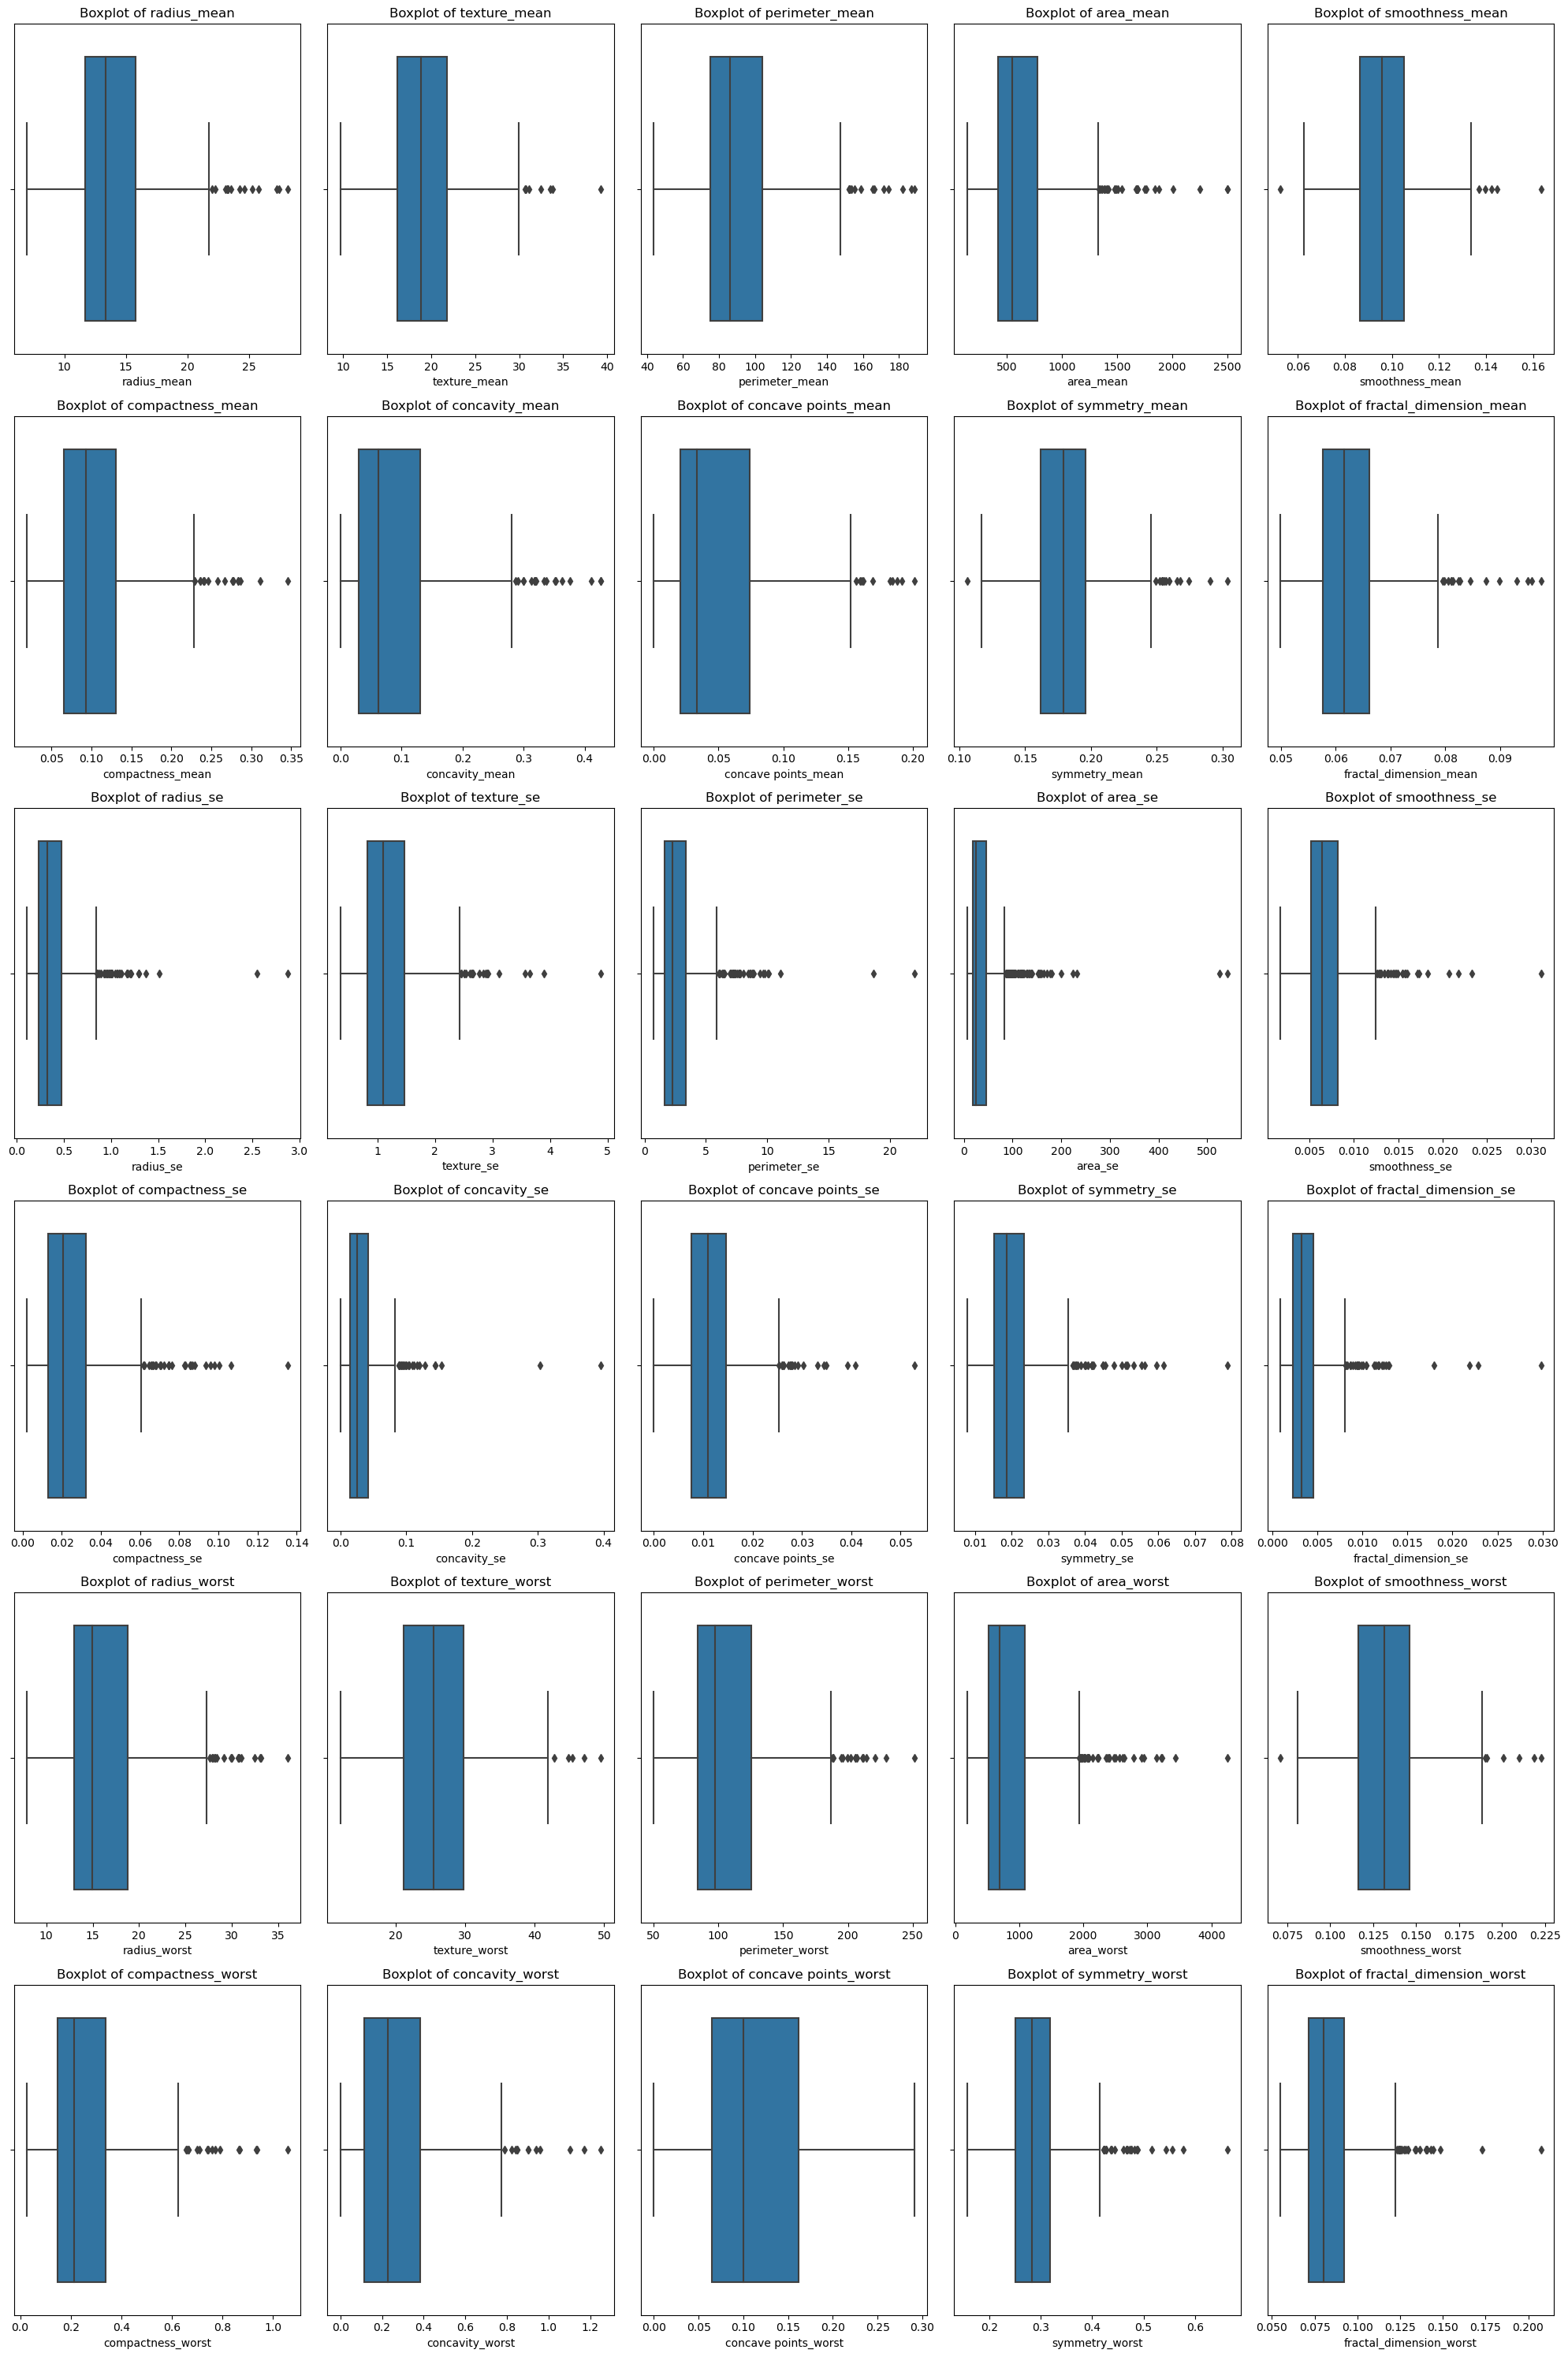

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def makeBoxPlots(rawDF, column_names):
    # Calculate the number of rows and columns for the subplots
    n_cols = 5  # You can adjust this value based on your preference and screen resolution
    n_rows = (len(column_names) + n_cols - 1) // n_cols  # Rounds up to ensure there is enough grid space

    # Create a subplot grid
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  # Adjust figsize dynamically
    axs = axs.flatten()  # Flatten the array of axes to simplify indexing

    # Plot a boxplot in each subplot
    for i, col in enumerate(column_names):
        sns.boxplot(x=rawDF[col], ax=axs[i])
        axs[i].set_title(f"Boxplot of {col}")

    # Hide any unused axes if the number of columns isn't a perfect multiple of `n_cols`
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')  # Turn off unused subplots

    plt.tight_layout()
    plt.show()

# Usage example:
# Assume `df` is your DataFrame and you want to plot boxplots for multiple columns
makeBoxPlots(rawDF, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])


In [7]:
# def remove_outliers_iqr(df, columns):
#     for column in columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Keep only the rows where column values are within the IQR bounds
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
#     return df

# # Example usage with a list of columns
# column_list = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
# iqrDF = remove_outliers_iqr(rawDF, column_list)

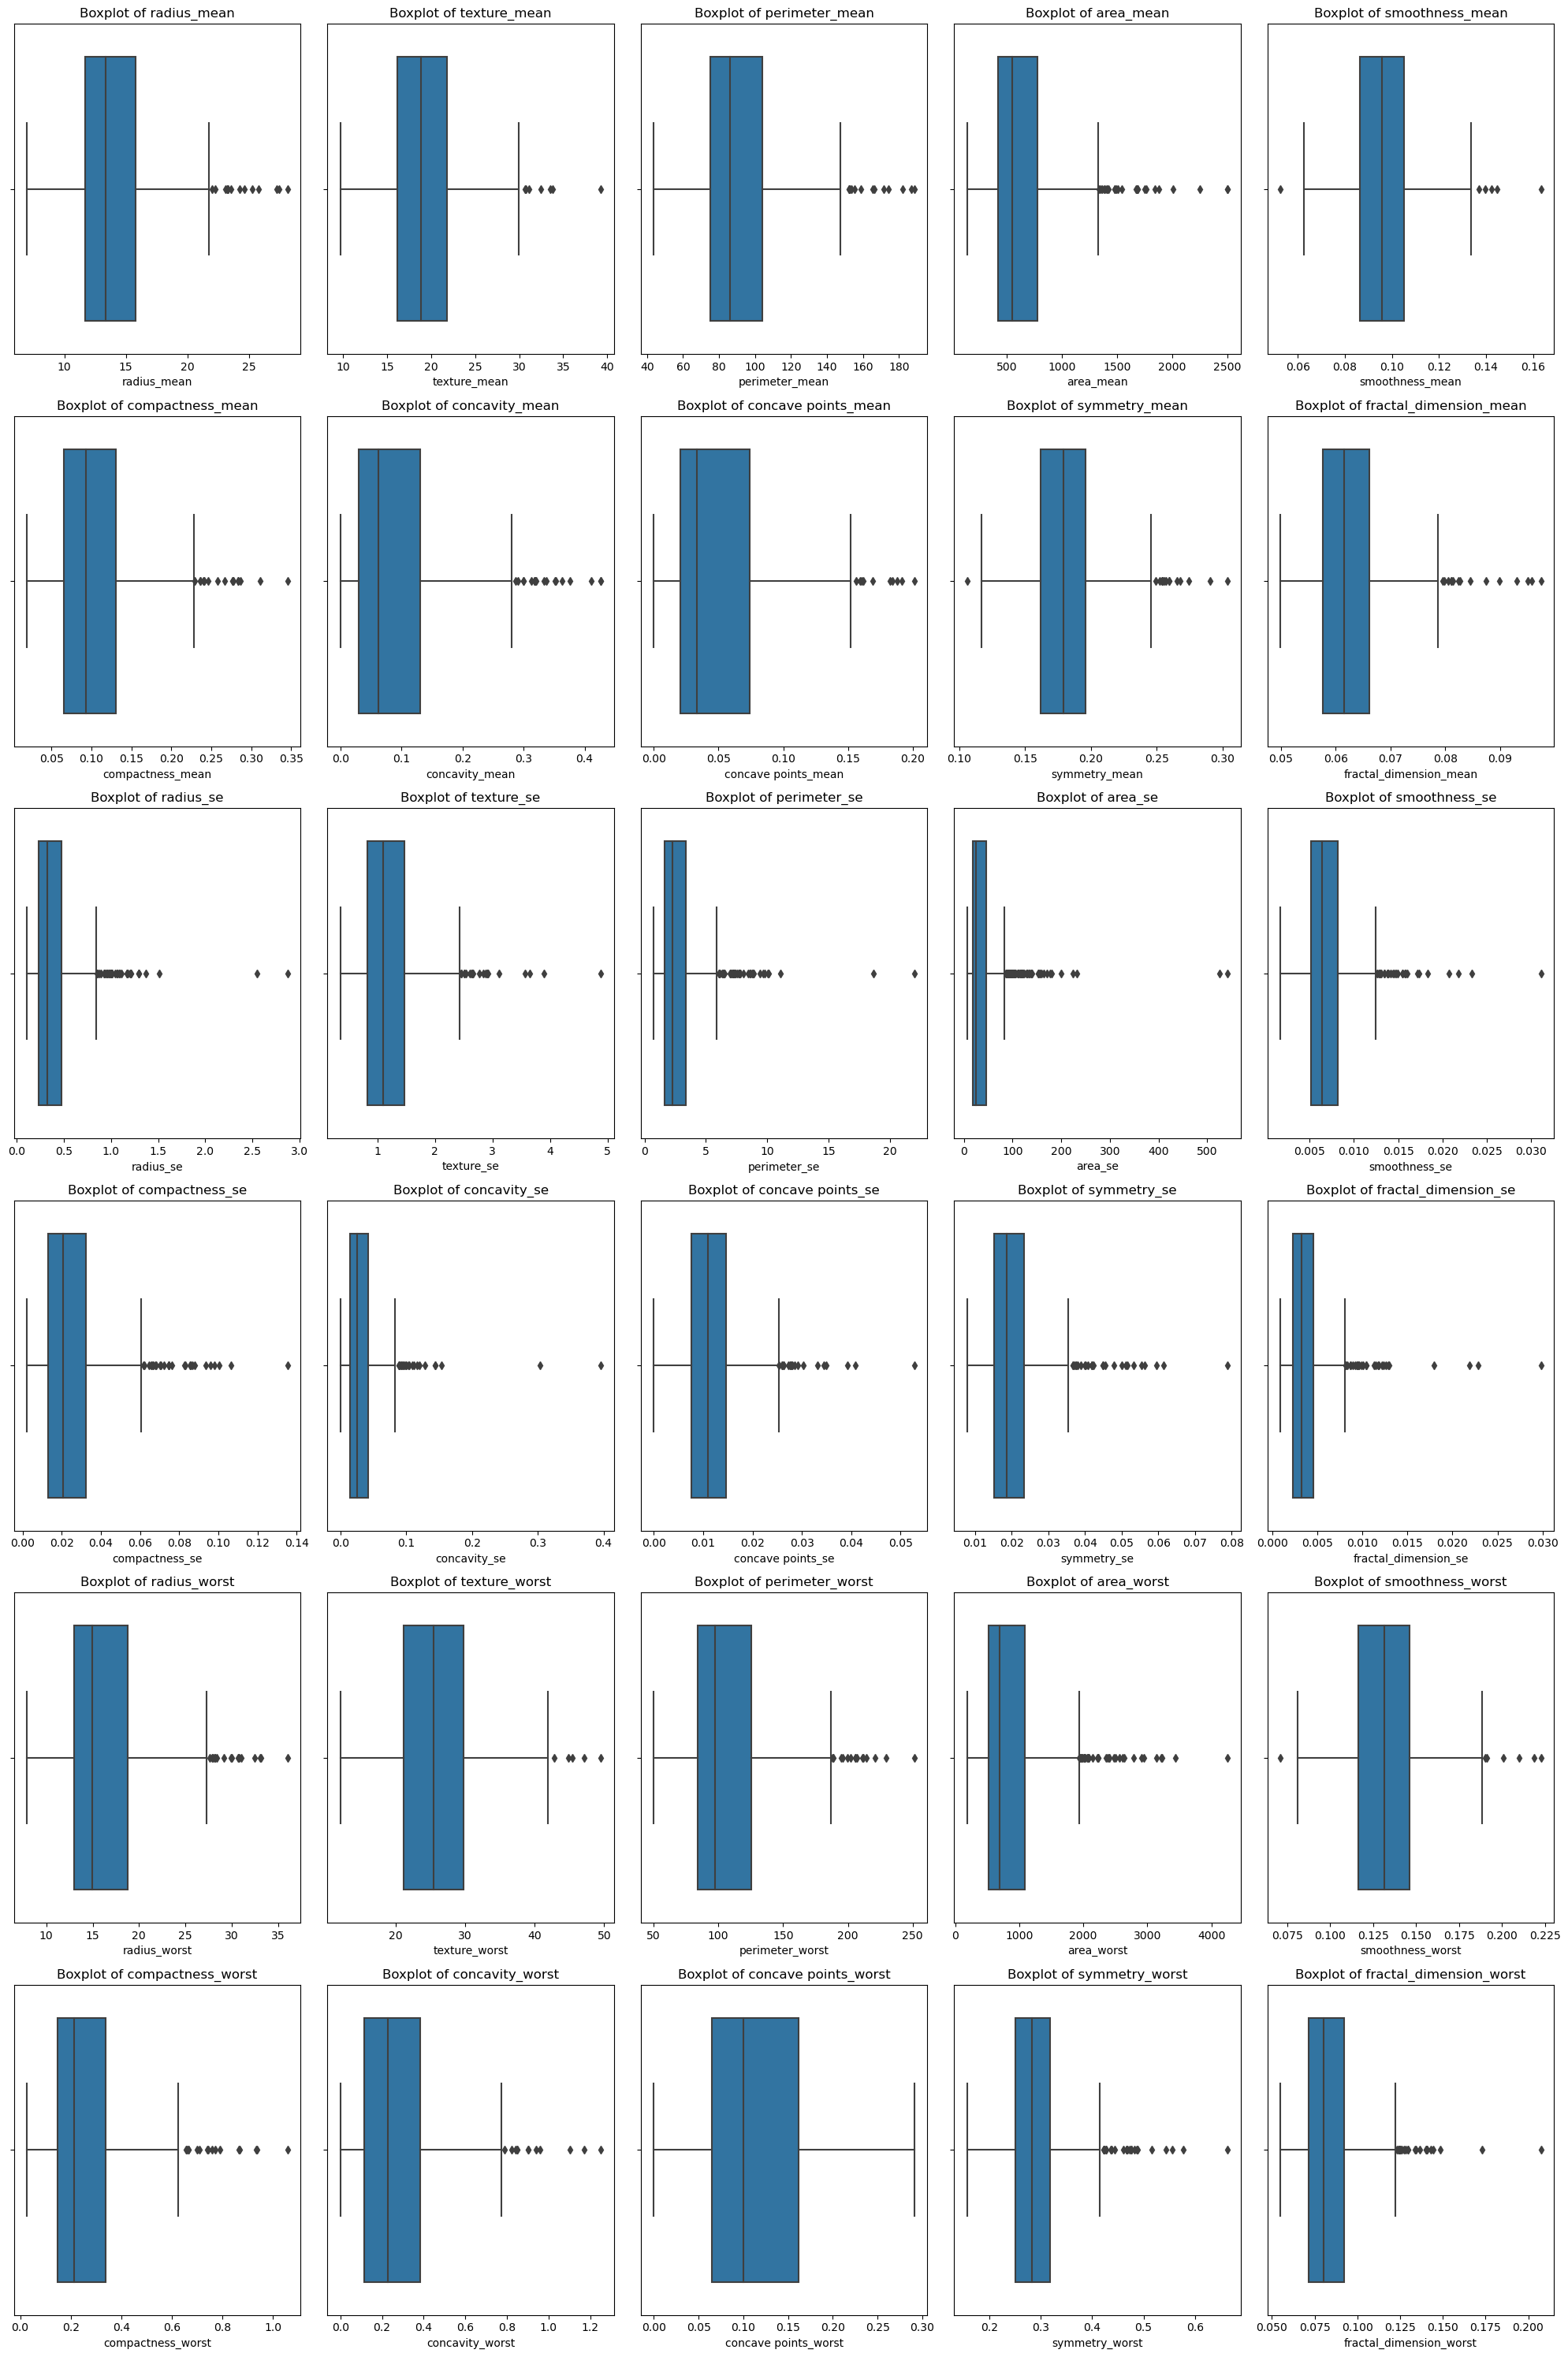

In [8]:
makeBoxPlots(rawDF, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

In [9]:
# Size of dataframe before outlier removal
print(rawDF.shape)

(569, 31)


In [10]:
# Size of dataframe after removal
print(rawDF.shape)

(569, 31)


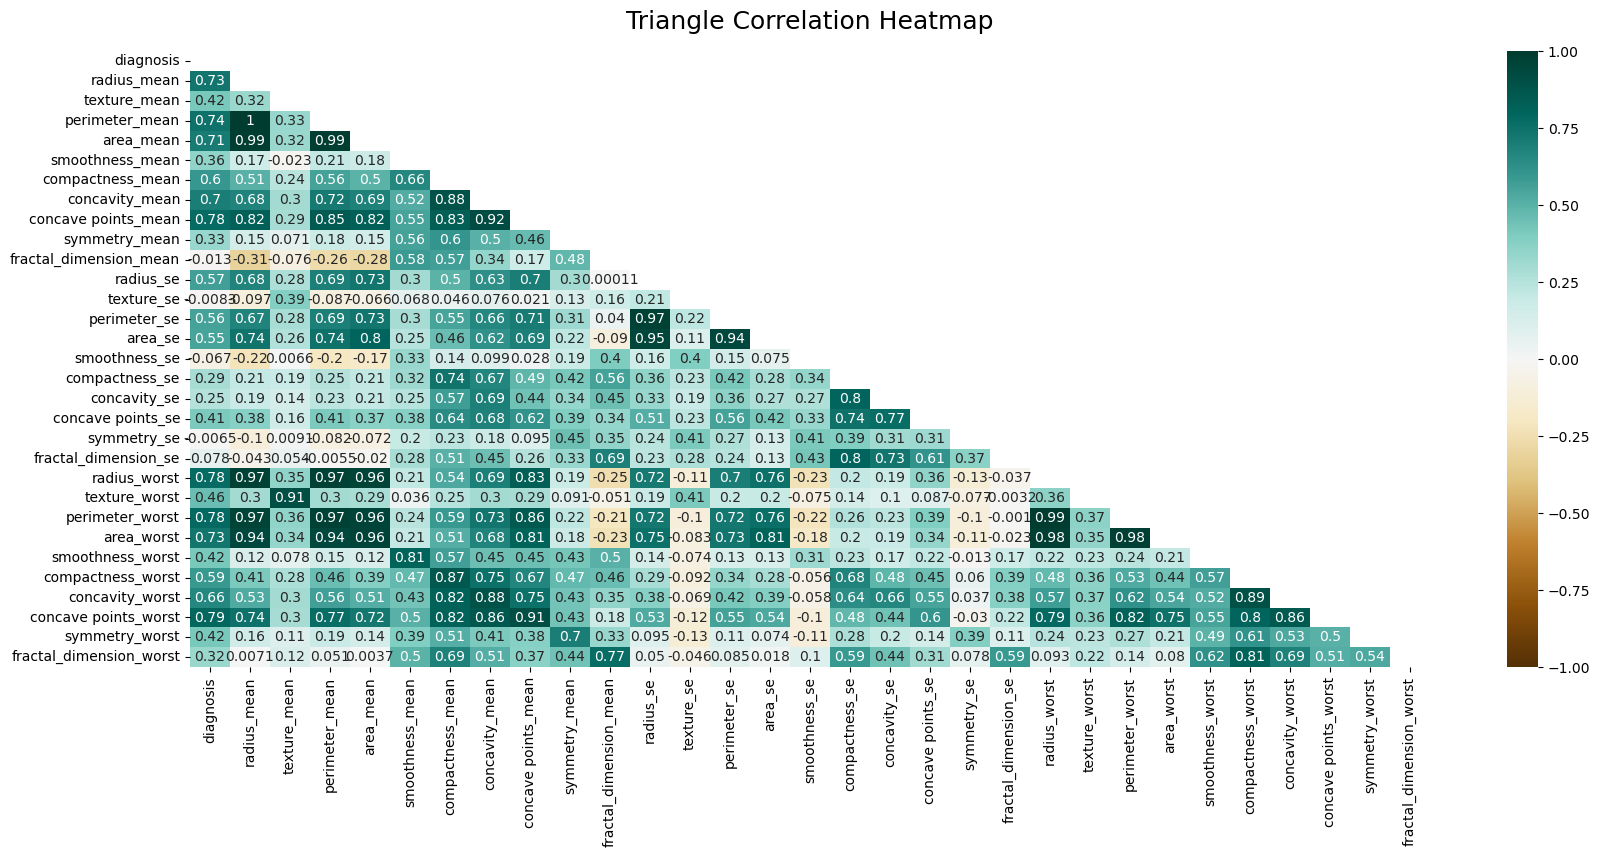

In [11]:
plt.figure(figsize=(20, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(rawDF.corr(), dtype=bool))
heatmap = sns.heatmap(rawDF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [12]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # initialize the DF
# normalizedDF = iqrDF

# normalizedDF[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]] = scaler.fit_transform(iqrDF[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]])

# normalizedDF.head()

In [13]:
yDF = rawDF["diagnosis"]
xDF = rawDF.drop(columns=["diagnosis"], axis=1)

yDF.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [14]:
xDF.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size=0.05,
    shuffle = True)

In [16]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
from sklearn.linear_model import LogisticRegression

parameters = {'penalty': ['l1', 'l2'], 
            'C': [0.01, 0.1, 1],
            'solver': ['liblinear']}
gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [19]:
from sklearn.svm import SVC

parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

svmParams = gridSearch.best_params_

svmParams

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [20]:
from sklearn.neural_network import MLPClassifier

parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'max_iter': 1000,
 'solver': 'adam'}

In [21]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

              
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_gridSearch = GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid=parameters,
                             scoring='recall',
                             cv=5,
                             verbose=0,
                             n_jobs=-1)  # Use all available CPUs

rf_gridSearch.fit(xTrainScaled, yTrain)

rfParams = rf_gridSearch.best_params_
rfParams



{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [23]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_gridSearch = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=parameters,
                              scoring='recall',
                              cv=5,
                              verbose=0)

knn_gridSearch.fit(xTrainScaled, yTrain)

knnParams = knn_gridSearch.best_params_
knnParams


{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = LogisticRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9074074074074074    Recall=0.9473684210526315    FScore=0.8780487804878049
Completed Fold 1
    Accuracy=0.9351851851851852    Recall=0.9487179487179487    FScore=0.9135802469135802
Completed Fold 2
    Accuracy=0.9259259259259259    Recall=0.9777777777777777    FScore=0.9166666666666665
Completed Fold 3
    Accuracy=0.9444444444444444    Recall=0.9743589743589743    FScore=0.9268292682926831
Completed Fold 4
    Accuracy=0.9629629629629629    Recall=0.9777777777777777    FScore=0.9565217391304347
Mean accuracy score: 0.9351851851851851
Mean f1 score: 0.9183293402982338
Mean precision score: 0.8763540880343861
Mean recall score: 0.965200179937022


In [26]:
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9722222222222222    Recall=0.9210526315789473    FScore=0.958904109589041
Completed Fold 1
    Accuracy=0.9814814814814815    Recall=0.9487179487179487    FScore=0.9736842105263158
Completed Fold 2
    Accuracy=0.9814814814814815    Recall=0.9555555555555556    FScore=0.9772727272727273
Completed Fold 3
    Accuracy=0.9907407407407407    Recall=1.0    FScore=0.9873417721518987
Completed Fold 4
    Accuracy=0.9814814814814815    Recall=0.9555555555555556    FScore=0.9772727272727273
Mean accuracy score: 0.9814814814814815
Mean f1 score: 0.974895109362542
Mean precision score: 0.9949999999999999
Mean recall score: 0.9561763382816014


In [27]:
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = SVC(**svmParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)



Completed Fold 0
    Accuracy=0.9814814814814815    Recall=0.9473684210526315    FScore=0.972972972972973
Completed Fold 1
    Accuracy=0.9907407407407407    Recall=0.9743589743589743    FScore=0.9870129870129869
Completed Fold 2
    Accuracy=0.9722222222222222    Recall=0.9555555555555556    FScore=0.9662921348314608
Completed Fold 3
    Accuracy=0.9907407407407407    Recall=0.9743589743589743    FScore=0.9870129870129869
Completed Fold 4
    Accuracy=0.9907407407407407    Recall=0.9777777777777777    FScore=0.9887640449438202
Mean accuracy score: 0.9851851851851852
Mean f1 score: 0.9804110253548455
Mean precision score: 0.9954545454545455
Mean recall score: 0.9658839406207826


In [28]:
from sklearn.neural_network import MLPClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9907407407407407    Recall=0.9736842105263158    FScore=0.9866666666666666
Completed Fold 1
    Accuracy=0.9814814814814815    Recall=0.9487179487179487    FScore=0.9736842105263158
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0
Mean accuracy score: 0.9944444444444445
Mean f1 score: 0.9920701754385964
Mean precision score: 1.0
Mean recall score: 0.9844804318488528


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_accuracyScores = []
knn_f1Scores = []
knn_precisionScores = []
knn_recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
    # Split the data
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yTrain.iloc[valIndex]

    # Feature scaling
    xScaler = StandardScaler()
    xTrainScaled = xScaler.fit_transform(xLocalTrain)
    xValScaled = xScaler.transform(xVal)

    # Instantiate and train the KNN classifier
    knn = KNeighborsClassifier(**knnParams)  # Assuming knnParams is predefined
    knn.fit(xTrainScaled, yLocalTrain)

    # Predict and evaluate
    yPred = knn.predict(xValScaled)
    knn_accuracyScores.append(accuracy_score(yVal, yPred))
    knn_f1Scores.append(f1_score(yVal, yPred))
    knn_precisionScores.append(precision_score(yVal, yPred))
    knn_recallScores.append(recall_score(yVal, yPred))

    print(f"Completed Fold {i}")
    print(f"    Accuracy={knn_accuracyScores[i]}    Recall={knn_recallScores[i]}    FScore={knn_f1Scores[i]}")

# Calculate the mean scores across all folds for KNN
print("KNN Mean accuracy score:", np.mean(knn_accuracyScores))
print("KNN Mean f1 score:", np.mean(knn_f1Scores))
print("KNN Mean precision score:", np.mean(knn_precisionScores))
print("KNN Mean recall score:", np.mean(knn_recallScores))


Completed Fold 0
    Accuracy=0.9629629629629629    Recall=0.9    FScore=0.9473684210526316
Completed Fold 1
    Accuracy=0.9722222222222222    Recall=0.925    FScore=0.961038961038961
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=0.9537037037037037    Recall=0.925    FScore=0.9367088607594937
Completed Fold 4
    Accuracy=0.9814814814814815    Recall=0.9512195121951219    FScore=0.975
KNN Mean accuracy score: 0.9740740740740741
KNN Mean f1 score: 0.9640232485702173
KNN Mean precision score: 0.9897435897435898
KNN Mean recall score: 0.9402439024390243


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_accuracyScores = []
rf_f1Scores = []
rf_precisionScores = []
rf_recallScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):
    # Split the data
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xTrain.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yTrain.iloc[valIndex]

    # Feature scaling (optional for RF but maintaining consistency)
    xScaler = StandardScaler()
    xTrainScaled = xScaler.fit_transform(xLocalTrain)
    xValScaled = xScaler.transform(xVal)

    # Instantiate and train the RF classifier
    rf = RandomForestClassifier(**rfParams)  # Assuming rfParams is predefined
    rf.fit(xTrainScaled, yLocalTrain)

    # Predict and evaluate
    yPred = rf.predict(xValScaled)
    rf_accuracyScores.append(accuracy_score(yVal, yPred))
    rf_f1Scores.append(f1_score(yVal, yPred))
    rf_precisionScores.append(precision_score(yVal, yPred))
    rf_recallScores.append(recall_score(yVal, yPred))

    print(f"Completed Fold {i}")
    print(f"    Accuracy={rf_accuracyScores[i]}    Recall={rf_recallScores[i]}    FScore={rf_f1Scores[i]}")

# Calculate the mean scores across all folds for RF
print("RF Mean accuracy score:", np.mean(rf_accuracyScores))
print("RF Mean f1 score:", np.mean(rf_f1Scores))
print("RF Mean precision score:", np.mean(rf_precisionScores))
print("RF Mean recall score:", np.mean(rf_recallScores))


Completed Fold 0
    Accuracy=0.9259259259259259    Recall=0.85    FScore=0.8947368421052632
Completed Fold 1
    Accuracy=0.9537037037037037    Recall=0.9    FScore=0.935064935064935
Completed Fold 2
    Accuracy=0.9722222222222222    Recall=0.95    FScore=0.9620253164556962
Completed Fold 3
    Accuracy=0.9537037037037037    Recall=0.95    FScore=0.9382716049382716
Completed Fold 4
    Accuracy=0.9537037037037037    Recall=0.926829268292683    FScore=0.9382716049382716
RF Mean accuracy score: 0.951851851851852
RF Mean f1 score: 0.9336740607004874
RF Mean precision score: 0.953721132013815
RF Mean recall score: 0.9153658536585366


In [31]:
### feature scaling
xScaler = StandardScaler()
xColNames = xLocalTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [32]:
################ 
# Logistic Regression
################
clf = LogisticRegression(**logisticParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

lrAccuracy = accuracy_score(yTest, preds)
lrFScore = f1_score(yTest, preds)
lrPrecision = precision_score(yTest, preds)
lrRecall = recall_score(yTest, preds)

################ 
# Neural Net
################
clf = MLPClassifier(**mlpParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

nnAccuracy = accuracy_score(yTest, preds)
nnFScore = f1_score(yTest, preds)
nnPrecision = precision_score(yTest, preds)
nnRecall = recall_score(yTest, preds)

################ 
# Decision Tree
################
clf = DecisionTreeClassifier(**treeParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

treeAccuracy = accuracy_score(yTest, preds)
treeFScore = f1_score(yTest, preds)
treePrecision = precision_score(yTest, preds)
treeRecall = recall_score(yTest, preds)

################ 
# Random Forest
################
clf = RandomForestClassifier(**rfParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

rfAccuracy = accuracy_score(yTest, preds)
rfFScore = f1_score(yTest, preds)
rfPrecision = precision_score(yTest, preds)
rfRecall = recall_score(yTest, preds)

################ 
# K-NN
################
clf = KNeighborsClassifier(**knnParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

knnAccuracy = accuracy_score(yTest, preds)
knnFScore = f1_score(yTest, preds)
knnPrecision = precision_score(yTest, preds)
knnRecall = recall_score(yTest, preds)

################ 
# SVM
################

clf = SVC(**svmParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

svmAccuracy = accuracy_score(yTest, preds)
svmFScore = f1_score(yTest, preds)
svmPrecision = precision_score(yTest, preds)
svmRecall = recall_score(yTest, preds)

scoreDict = {"model" : ["Neural Network", "SVM", "K-NN", "Decision Tree", "RF", "LR"],
            "accuracy" : [nnAccuracy, svmAccuracy, knnAccuracy, treeAccuracy, rfAccuracy, lrAccuracy],
            "fScore" : [nnFScore, svmFScore, knnFScore, treeFScore, rfFScore, lrFScore],
            "precision" : [nnPrecision, svmPrecision, knnPrecision, treePrecision, rfPrecision, lrPrecision],
            "recall" : [nnRecall, svmRecall, knnRecall, treeRecall, rfRecall, lrRecall]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,accuracy,fScore,precision,recall
0,Neural Network,0.965517,0.952381,1.0,0.909091
1,SVM,1.000000,1.000000,1.0,1.000000
2,K-NN,0.931034,0.900000,1.0,0.818182
3,Decision Tree,0.862069,0.777778,1.0,0.636364
4,RF,0.896552,0.842105,1.0,0.727273
5,LR,0.965517,0.952381,1.0,0.909091


In [33]:
styled_results = resultsDF.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14pt'), ('text-align', 'center'), ('color', 'black')]},
     {'selector': 'td', 'props': [('text-align', 'center'), ('color', 'black')]},
     {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#f5f5f5')]},
     {'selector': 'tr:nth-of-type(even)', 'props': [('background', 'white')]},
     {'selector': 'tr:hover', 'props': [('background-color', '#ffff99')]},
    ], overwrite=False)

styled_results = styled_results.format({
    'accuracy': '{:,.2f}'.format,
    'fScore': '{:,.2f}'.format,
    'precision': '{:,.2f}'.format,
    'recall': '{:,.2f}'.format
})

styled_results = styled_results.hide()

styled_results

model,accuracy,fScore,precision,recall
Neural Network,0.97,0.95,1.00,0.91
SVM,1.00,1.00,1.00,1.00
K-NN,0.93,0.90,1.00,0.82
Decision Tree,0.86,0.78,1.00,0.64
RF,0.90,0.84,1.00,0.73
LR,0.97,0.95,1.00,0.91
